<a href="https://colab.research.google.com/github/SaralaMuthu/Learntocode/blob/master/BPD_PCC_PCA_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install np_utils

In [1]:
import seaborn as sn; sn.set()
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm
#Using TensorFlow backend.
#File read


In [2]:
set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

filename = '/content/FinalFeatures_PCC_v1.csv'
training_data = pd.read_csv(filename)
training_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,Class
0,5.814461,4.523529,5.861289,7.760390,7.557991,3.157861,5.806259,6.530817,6.793683,5.654377,...,7.013956,5.806259,7.503879,3.861675,6.625338,5.877008,5.097007,6.126479,5.379132,1
1,5.490646,4.045711,5.378000,7.541001,7.175278,3.218402,5.584114,6.396665,6.436227,5.611697,...,6.774859,5.536714,7.138310,4.075623,6.315447,5.788487,4.714289,5.791145,4.841773,1
2,6.119181,4.732886,5.629931,7.976484,7.512317,3.958645,5.600948,6.793305,6.969830,5.252690,...,6.984089,6.282643,7.545915,4.065851,6.607297,5.726435,5.582935,6.093140,5.481281,0
3,6.198601,4.645750,5.652507,7.968814,7.601933,4.065383,5.874618,6.781579,6.822183,5.400165,...,6.964324,6.433518,7.573325,4.070348,6.545645,5.621731,5.590918,6.062415,5.499390,0
4,6.015423,4.058134,5.617794,7.171410,7.664509,3.477890,5.276624,6.697368,6.575804,5.772602,...,6.982613,5.722488,7.642393,4.111466,6.747334,5.916502,5.140562,6.030130,5.255621,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4.913103,4.096848,4.907746,7.385046,6.794406,3.583364,5.034849,6.316001,6.522220,5.020811,...,6.684770,5.768778,6.520768,4.024539,6.253681,5.115699,4.642886,5.131912,4.760010,1
84,5.547031,4.328881,5.445585,7.797057,7.137664,3.188970,5.881988,6.554015,6.369021,5.124387,...,6.513100,5.926193,7.080519,4.078146,6.688884,5.801479,5.213693,5.780626,4.975815,1
85,5.793194,4.114504,5.893285,7.634943,7.232602,3.716190,5.420028,6.688836,7.149511,5.344095,...,7.151578,5.763762,6.742094,4.293531,6.958907,5.324848,5.159040,5.750851,5.235872,0
86,5.764954,4.076945,6.238869,7.622692,7.657293,4.081064,5.764358,6.949018,7.027571,5.358558,...,6.934620,6.151484,7.084864,4.354297,7.197149,5.542692,5.173574,6.192752,5.441002,0


In [4]:
label_vectors = training_data['Class'].values
feature_vectors = training_data.drop(['Class'], axis=1).values

In [5]:
label_vectors

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [6]:
feature_vectors

array([[5.8144607 , 4.52352883, 5.86128939, ..., 5.09700701, 6.12647905,
        5.37913153],
       [5.49064577, 4.04571107, 5.37800019, ..., 4.71428906, 5.79114508,
        4.84177267],
       [6.11918148, 4.73288635, 5.62993106, ..., 5.58293493, 6.09313997,
        5.48128146],
       ...,
       [5.79319422, 4.11450394, 5.89328493, ..., 5.15903979, 5.75085074,
        5.235872  ],
       [5.76495432, 4.07694525, 6.2388692 , ..., 5.17357426, 6.19275175,
        5.44100165],
       [5.50609176, 3.6316149 , 5.54942299, ..., 5.05886226, 5.44841004,
        4.71844434]])

In [7]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

In [8]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors,
                                                                                        test_size=validation_size,
                                                                                        random_state=seed)

In [39]:
X_trainScaler.shape

(70, 60)

In [41]:
X_trainScaler

array([[-2.60967396, -1.23770093, -0.8226718 , ..., -0.67068375,
        -2.43508993, -1.10249656],
       [ 1.0042929 , -0.25766303,  0.89158017, ...,  0.39539412,
         1.5320035 ,  1.78219926],
       [-0.76006207, -1.69140984, -0.2511158 , ...,  1.2289211 ,
        -1.30890911, -0.57440071],
       ...,
       [ 0.2145539 ,  2.51227579,  1.10759855, ...,  0.29471711,
         0.38667377,  0.73493956],
       [-2.13887405, -0.81914785, -0.72388992, ..., -1.73693469,
        -1.05564419, -1.02961038],
       [ 0.38025558, -0.29273929,  0.15738584, ...,  0.17821624,
         0.57511447,  1.08988483]])

In [9]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)

In [40]:
X_trainPCAScaler.shape

(70, 29)

In [42]:
X_trainPCAScaler

array([[ 1.32354882e+01, -2.29342773e+00, -2.84644441e+00, ...,
        -1.01670815e-01,  4.45965974e-02,  2.20983883e-01],
       [-5.68541668e+00,  4.52820391e-01,  2.05311415e+00, ...,
         1.09373508e+00, -7.65724120e-01,  3.29796442e-01],
       [ 2.88432011e+00,  2.44305345e+00,  1.09237400e+00, ...,
        -4.76865658e-01,  6.46561937e-03,  6.12843976e-01],
       ...,
       [-4.72850290e+00, -1.33732185e+00,  1.18351078e+00, ...,
         1.87644324e-02,  3.58088190e-01, -4.92329289e-01],
       [ 7.66432681e+00, -1.65854962e+00, -1.73406749e+00, ...,
         7.16036279e-01, -6.99878845e-01,  9.69966932e-02],
       [-3.00164654e+00,  5.15406591e-01,  2.16595063e+00, ...,
        -3.20999363e-01,  2.63958022e-01,  1.04599710e+00]])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 60)]              0         
                                                                 
 dense_40 (Dense)            (None, 50)                3050      
                                                                 
 dense_41 (Dense)            (None, 50)                2550      
                                                                 
 dense_42 (Dense)            (None, 50)                2550      
                                                                 
 dense_43 (Dense)            (None, 2)                 102       
                                                                 
Total params: 8,252
Trainable params: 8,252
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 2s

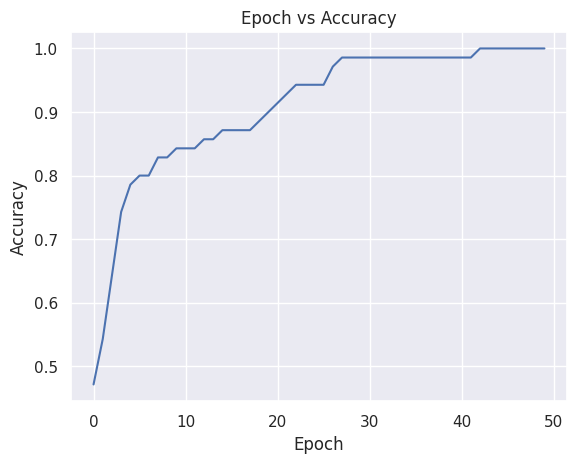

Baseline Error: 16.67%


In [27]:
encoded_YTrain = Y_trainScaler
encoded_YValidation = Y_validationScaler
encode_XTrain=X_trainScaler
encode_Xvalidation=X_validationScaler

# Multilayer Perceptron
one_hot_labels_train = keras.utils.to_categorical(encoded_YTrain, num_classes=2)
one_hot_labels_validation = keras.utils.to_categorical(encoded_YValidation, num_classes=2)
visible = Input(shape=(encode_XTrain.shape[1],))
hidden1 = Dense(50, activation='relu')(visible)
#Dropout(0.1)
hidden2 = Dense(50, activation='relu')(hidden1)
#Dropout(0.1)
hidden3 = Dense(50, activation='relu')(hidden2)
#Dropout(0.1)
output = Dense(2, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse','mae','mape'])
# summarize layers
print(model.summary())
# Fit the model
history=model.fit(encode_XTrain, one_hot_labels_train, epochs=50, batch_size=139)

# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
scores = model.evaluate(encode_Xvalidation, one_hot_labels_validation, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [16]:
feature_vectors

array([[5.8144607 , 4.52352883, 5.86128939, ..., 5.09700701, 6.12647905,
        5.37913153],
       [5.49064577, 4.04571107, 5.37800019, ..., 4.71428906, 5.79114508,
        4.84177267],
       [6.11918148, 4.73288635, 5.62993106, ..., 5.58293493, 6.09313997,
        5.48128146],
       ...,
       [5.79319422, 4.11450394, 5.89328493, ..., 5.15903979, 5.75085074,
        5.235872  ],
       [5.76495432, 4.07694525, 6.2388692 , ..., 5.17357426, 6.19275175,
        5.44100165],
       [5.50609176, 3.6316149 , 5.54942299, ..., 5.05886226, 5.44841004,
        4.71844434]])

In [11]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors,
                                                                test_size=validation_size, random_state=seed)

In [20]:
X_train

array([[4.42892224, 3.78305707, 5.27058462, ..., 5.00985316, 4.92656308,
        4.85014875],
       [6.06269556, 4.07990054, 5.89832924, ..., 5.28633736, 6.21616758,
        5.79190307],
       [5.26508003, 3.64563327, 5.47988361, ..., 5.50251017, 5.29265677,
        5.02255395],
       ...,
       [5.70567665, 4.91888674, 5.97743335, ..., 5.26022707, 5.84384905,
        5.45000867],
       [4.64175771, 3.90983252, 5.30675771, ..., 4.73332407, 5.37498696,
        4.87394359],
       [5.78058574, 4.0692763 , 5.62947347, ..., 5.23001291, 5.90510649,
        5.56588613]])

In [12]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)

In [35]:
X_train

array([[4.42892224, 3.78305707, 5.27058462, ..., 5.00985316, 4.92656308,
        4.85014875],
       [6.06269556, 4.07990054, 5.89832924, ..., 5.28633736, 6.21616758,
        5.79190307],
       [5.26508003, 3.64563327, 5.47988361, ..., 5.50251017, 5.29265677,
        5.02255395],
       ...,
       [5.70567665, 4.91888674, 5.97743335, ..., 5.26022707, 5.84384905,
        5.45000867],
       [4.64175771, 3.90983252, 5.30675771, ..., 4.73332407, 5.37498696,
        4.87394359],
       [5.78058574, 4.0692763 , 5.62947347, ..., 5.23001291, 5.90510649,
        5.56588613]])

In [37]:
X_trainPCA

array([[ 4.37699801e+00, -6.84114484e-01, -7.18441339e-01, ...,
        -4.92554250e-02,  3.91715109e-02,  2.62282385e-01],
       [-1.70958147e+00,  7.88395232e-01,  3.62134865e-01, ...,
        -4.42794702e-02, -2.66275185e-01,  6.63916429e-02],
       [ 1.11435359e+00, -2.20210450e-03,  3.69432779e-01, ...,
        -3.61411528e-02,  5.95625803e-03,  2.41436459e-01],
       ...,
       [-1.55095822e+00,  6.18199532e-01, -1.87071089e-01, ...,
         9.96840575e-02,  2.28813461e-01, -2.42961509e-02],
       [ 2.53206494e+00, -1.08583418e-01, -6.57043065e-01, ...,
        -6.42789501e-02, -1.04295585e-01, -1.79876354e-01],
       [-8.50771680e-01,  1.19458857e+00,  8.72657734e-01, ...,
         5.73044947e-02,  9.38532111e-03,  4.50546417e-03]])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 27)]              0         
                                                                 
 dense_48 (Dense)            (None, 50)                1400      
                                                                 
 dense_49 (Dense)            (None, 50)                2550      
                                                                 
 dense_50 (Dense)            (None, 50)                2550      
                                                                 
 dense_51 (Dense)            (None, 2)                 102       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [==============================] - 2

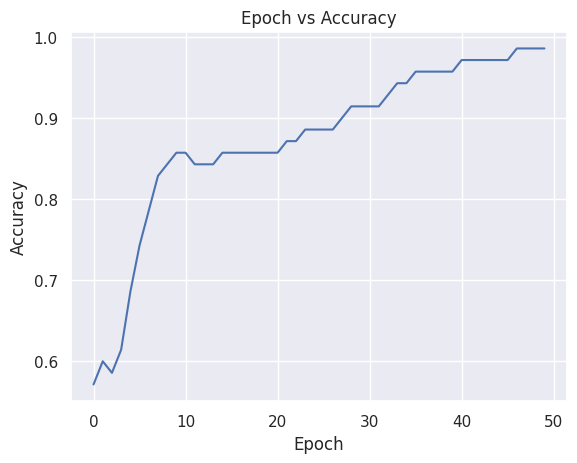

Baseline Error: 11.11%


In [29]:
encoded_YTrain = Y_train
encoded_YValidation = Y_validation
encode_XTrain=X_trainPCA
encode_Xvalidation=X_validationPCA

# Multilayer Perceptron
one_hot_labels_train = keras.utils.to_categorical(encoded_YTrain, num_classes=2)
one_hot_labels_validation = keras.utils.to_categorical(encoded_YValidation, num_classes=2)
visible = Input(shape=(encode_XTrain.shape[1],))
hidden1 = Dense(50, activation='relu')(visible)
#Dropout(0.1)
hidden2 = Dense(50, activation='relu')(hidden1)
#Dropout(0.1)
hidden3 = Dense(50, activation='relu')(hidden2)
#Dropout(0.1)
output = Dense(2, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse','mae','mape'])
# summarize layers
print(model.summary())
# Fit the model
history=model.fit(encode_XTrain,one_hot_labels_train , epochs=50, batch_size=139)

# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
scores = model.evaluate(encode_Xvalidation, one_hot_labels_validation, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))